In [10]:
# first show histogram of possible outcomes for 1 game

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import collections
from termcolor import colored
from icecream import ic

In [12]:
d4 = list(range(1, 5))
d6 = list(range(1, 7))
d8 = list(range(1, 9))
d9 = list(
    range(1, 10)
)  ##????? on IBM website it says this is 0-9 die? instead of 1-9?
d12 = list(range(1, 13))
d20 = list(range(1, 21))

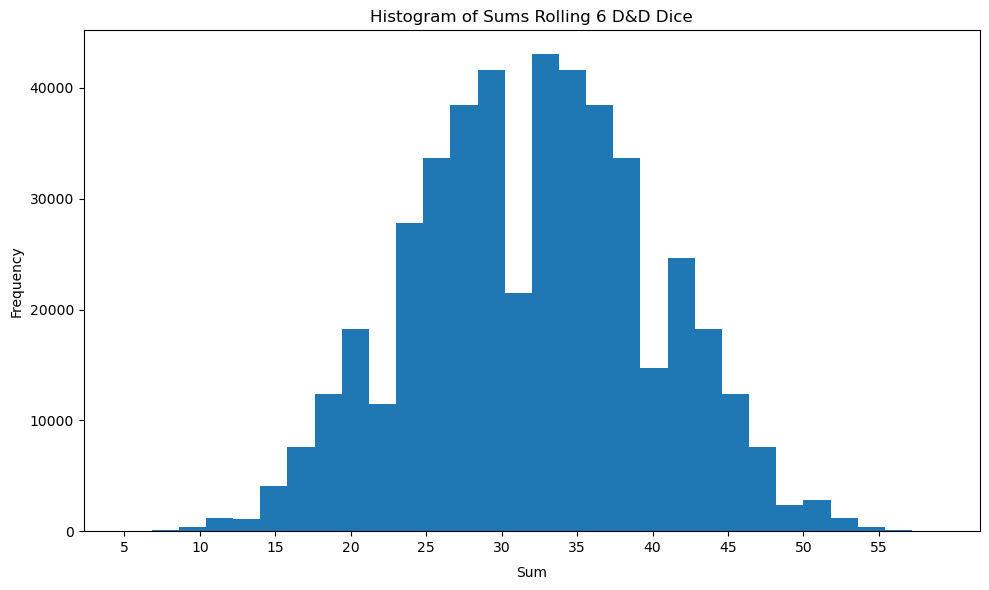

In [13]:
sums = []
for v1 in d4:
    for v2 in d6:
        for v3 in d8:
            for v4 in d9:
                for v5 in d12:
                    for v6 in d20:
                        sums.append(v1 + v2 + v3 + v4 + v5 + v6)

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(sums, bins=30)
ax.set_xlabel("Sum", labelpad=8)
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Sums Rolling 6 D&D Dice")

ax.xaxis.set_ticks(np.arange(min(sums), max(sums) + 1, 5))
ax.xaxis.set_major_formatter("{x:.0f}")

fig.tight_layout()

plt.show()

In [14]:
from sympy import isprime


def is_alice_win(n):
    return isprime(n)


def is_bob_win(n):
    return not is_alice_win(n) and n % 2 == 0

In [15]:
# get probability that alice and bob each win a game
total_outcomes = len(sums)
alice_win_outcomes = bob_win_outcomes = 0


for k, v in collections.Counter(sums).items():
    if is_alice_win(k):
        alice_win_outcomes += v
    if is_bob_win(k):
        bob_win_outcomes += v

ic(alice_win_outcomes, bob_win_outcomes, total_outcomes)

alice_win_prob = alice_win_outcomes / total_outcomes
bob_win_prob = bob_win_outcomes / total_outcomes
draw_prob = 1 - (alice_win_prob + bob_win_prob)

print(f"Alice wins: {alice_win_prob:.10f}")
print(f"Bob wins: {bob_win_prob:.10f}")
print(f"Draw: {draw_prob:.10f}")

ic| alice_win_outcomes: 114399
    bob_win_outcomes: 230400
    total_outcomes: 460800


Alice wins: 0.2482617187
Bob wins: 0.5000000000
Draw: 0.2517382812


In [16]:
in_prob = bob_win_outcomes / total_outcomes
draw_prob = 1 - (alice_win_prob + bob_win_prob)

print(f"Alice wins: {alice_win_prob:.10f}")
print(f"Bob wins: {bob_win_prob:.10f}")
print(f"Draw: {draw_prob:.10f}")

Alice wins: 0.2482617187
Bob wins: 0.5000000000
Draw: 0.2517382812


In [17]:
# # driver code for basic MDP

# # Transition probability matrix
# P = np.array([[0.25, 0.25, 0.5],
#                [0, 1, 0],
#                [0, 0, 1]])
# t,r = 1, 2

# Q = P[:t, :t]
# R = P[:t, t:r+t]
# print(Q.shape)
# print(R.shape)
# N = np.linalg.inv(np.eye(t) - Q)

# B = N @ R
# print(B[0,0], B[0,1])


# Number of wins to finish
N_STATES = 13

# Transition probability matrix
P = np.zeros((2 * N_STATES + 2, 2 * N_STATES + 2))
# alice loop
for i in range(N_STATES):
    P[i, 0] = draw_prob
    P[i, N_STATES] = bob_win_prob

    if i == N_STATES - 1:
        P[i, 2 * N_STATES] = alice_win_prob
        break

    P[i, i + 1] = alice_win_prob


for i in range(N_STATES, 2 * N_STATES):
    P[i, 0] = draw_prob
    P[i, 1] = alice_win_prob

    if i == 2 * N_STATES - 1:
        P[i, 2 * N_STATES + 1] = bob_win_prob
        break

    P[i, i + 1] = bob_win_prob

# add absorbing states
P[2 * N_STATES, 2 * N_STATES] = 1
P[2 * N_STATES + 1, 2 * N_STATES + 1] = 1

for i in range(P.shape[1] + 1):
    print(f"{i:04}", end=" ")
print()

for i, row in enumerate(P):
    print(f"{i+1:04}", end=" ")
    for value in row:
        if value == 0:
            print(f"{value:04}", end=" ")
        else:
            print(colored(f"{value:04}", "blue", "on_yellow"), end=" ")
    print()

0000 0001 0002 0003 0004 0005 0006 0007 0008 0009 0010 0011 0012 0013 0014 0015 0016 0017 0018 0019 0020 0021 0022 0023 0024 0025 0026 0027 0028 
0001 0.25173828125 0.24826171875 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.5 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 
0002 0.25173828125 00.0 0.24826171875 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.5 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 
0003 0.25173828125 00.0 00.0 0.24826171875 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.5 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 
0004 0.25173828125 00.0 00.0 00.0 0.24826171875 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.5 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 
0005 0.25173828125 00.0 00.0 00.0 00.0 0.24826171875 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.5 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 00.0 
0006 0.25173828125 00.0 00.0 00.0 

In [18]:
t, r = 2 * N_STATES - 1, 2
Q = P[:t, :t]
R = P[:t, t : r + t]

N = np.linalg.inv(np.eye(t) - Q)

B = N @ R

print(B[0])
print(f"Alice win: {B[0,1]:.5f}")
print(f"Bob win: {B[0,0]:.5f}")

[9.99832433e-01 1.67566680e-04]
Alice win: 0.00017
Bob win: 0.99983
